# Exploring World Bank Data with ChatGPT

In this notebook, we'll explore some data from the World Bank with the help of ChatGPT. We'll do some basic exploratory data analysis, primarily in Python, but maybe also a bit in R.

# Setup

Just run the cells in this section. Don't worry about the contents. They simply set up the notebook to use R and Python in the same notebook and import some commonly used packages in both languages.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Example Cells

Below is a Python cell, there is nothing at the top of the cell because it is python by default.

In [4]:
# EXAMPLE PYTHON CELL

# create a dataframe of random numbers with two columns, A and B
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))

# display first 5 rows
df.head(5)

,A,B
0,61,27
1,61,63
2,15,25
3,28,16
4,57,64


This is a Python notebook, but below is an R cell. 

The `%%R` at the top of the cell indicates that the code in this cell will be R code. `%%R -i df` indicates that this is an R cell and imports the dataframe (stored in the `df` variable) from Python. This is one way to pass data back and forth from R to Python. Another is to write a CSV file in Python and read it in R (or vice versa). Below we use R's awesome ggplot library to plot the data we created in Python in the cell above.

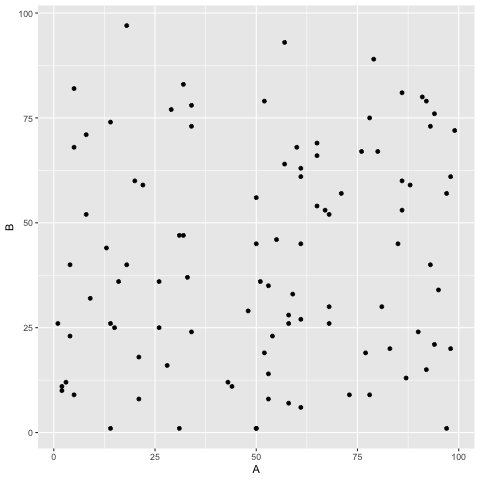

In [5]:
%%R -i df

# Plotting using R
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

# World Bank Data

Ok, now that you're familiar with the setup, let's start with world bank data! 

### Loading the Data


#### Step 1: Give ChatGPT a "starter prompt"

The default system prompt is "you are a helpful assistant", but ChatGPT will need some more context. 

Here is my starting point:

I have a file containing some data about Contract Awards of investment projects. The file is at the following path `data/Contract_Awards_in_Investment_Project_Financing_20231113.csv`

I will tell you a bit more about the file and then I will ask you some questions. Please help me write python code to answer those questions.



#### Step 2: Let's tell ChatGPT about the data. 

You will have to be VERY explicit about 

1. what the file contains
2. what the columns are and the values in the columns (if there is a data dictionary, you can copy/paste from there) 

**Loading a file: Contract Awards in Investment Project Financing [link](https://www.google.com/url?q=https://finances.worldbank.org/Procurement/Contract-Awards-in-Investment-Project-Financing/kdui-wcs3&sa=D&source=editors&ust=1699895909050601&usg=AOvVaw1zwDti0oCf-ygNMoBqVhwC)**


The data in this file includes all contract awards financed by The World Bank under Investment Project Financing (IPF) operations. The data source is STEP (Systematic Tracking of Exchanges in Procurement), which is required to be used by Borrowers in all IPF operations subject to the World Bank’s Procurement Regulations. Data is entered by Borrowers. "Supplier Country" represents the place of supplier registration, which may or may not be the supplier's actual country of origin. Information does not include awards to subcontractors, nor does it account for cofinancing.

Please note that for contracts awarded to joint-ventures of multiple companies, the total contract value was split equally amongst the members of the joint-venture.

| Column Name                   | Description                                                                      | Type       |
|-------------------------------|----------------------------------------------------------------------------------|------------|
| As of Date                    | Represents the date when this snapshot was taken.                               | Date & Time|
| Fiscal Year                   | The fiscal year begins on July 1st of the previous year and runs through June 30th of the designated year. | Number     |
| Region                        | Country lending is grouped into regions based on the current World Bank administrative (rather than geographic) region where project implementation takes place. The Other Region is used for loans to the IFC. | Plain Text |
| Borrower Country              | Country to which loan or credit has been issued. Loans to the IFC are included under the country “World”. | Plain Text |
| Borrower Country Code         | Country Code according to the World Bank country list. Might be different from the ISO country code. | Plain Text |
| Project ID                    | A Bank project is referenced by a project ID (Pxxxxxxx). More than one loan, credit, or grant may be associated with one Project ID. | Plain Text |
| Project Name                  | Short descriptive project name.                                                  | Plain Text |
| Project Global Practice       | Indicates major sector for specific contract.                                     | Plain Text |
| Procurement Category          | Describes procurement category.                                                   | Plain Text |
| Procurement Method            | The method used for selecting a contractor, supplier or consultant. The method used depends upon the Procurement Category. | Plain Text |
| WB Contract Number            | Internal World Bank Contract number.                                              | Plain Text |
| Contract Description          | Contract description as it appears in the signed agreement.                        | Plain Text |
| Borrower Contract Reference Number | Contract reference number used by Borrower.                                     | Plain Text |
| Contract Signing Date         | Date when the contract was signed.                                               | Date & Time|
| Supplier ID                   |   --                                                                                 | Plain Text |
| Supplier                      | The name of the contractor, supplier or consultant who submitted the winning bid or proposal. The name of the manufacturer, Joint Venture partners, sub-contractor, and/or sub-consultants may not appear. | Plain Text |
| Supplier Country              | The nationality of awarded firms is based on place of registration, which may or may not be the same as the country of origin. For the country where the work is being performed, or the goods are being delivered, use Borrower Country. | Plain Text |
| Supplier Country Code         | Supplier Country Code according to the World Bank country list. Might be different from the ISO country code. The nationality of awarded firms is based on place of registration, which may or may not be the same as the country of origin. | Plain Text |
| Supplier Contract Amount (USD)| All contract values reflect committed (not disbursed) amounts, and are in US dollars, based on the US Treasury's rate of exchange at the time of the Bank's no objection to the contract award. | Number     |
| Review type                   | The Bank reviews whether the Borrower’s procurement process complies with the legal agreement and the Procurement Regulations for Borrowers either prior to or post procurement. | Plain Text |


I have the following starter code

In [6]:
contracts_df = pd.read_csv('data/Contract_Awards_in_Investment_Project_Financing_20231113.csv')
contracts_df

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country,Supplier Country Code,Supplier Contract Amount (USD),Review type
0,"Nov 13, 2023",2023,LATIN AMERICA AND CARIBBEAN,Peru,PE,P162833,Improving the Performance of Non-Criminal Just...,Public Administration,Civil Works,Request for Quotations,1751630,SERVICIO DE MEJORAMIENTO DE LA SEDE MEGA ALEGR...,26-2022-PMSAJ-EJENOPENAL,"Nov 16, 2022",711960.0,ALTA CONTRATA E.I.R.L. - ALTACON E.I.R.L.,Peru,PE,51209.77,Post
1,"Nov 13, 2023",2023,LATIN AMERICA AND CARIBBEAN,Peru,PE,P162833,Improving the Performance of Non-Criminal Just...,Public Administration,Civil Works,Request for Quotations,1751629,SERVICIO DE MEJORAMIENTO DE LA SEDE ALEGRA SAN...,28-2022-PMSAJ-EJENOPENAL,"Nov 23, 2022",712242.0,RCK CONTRATISTAS GENERALES S.A.C.,Peru,PE,51963.62,Post
2,"Nov 13, 2023",2023,LATIN AMERICA AND CARIBBEAN,Peru,PE,P162833,Improving the Performance of Non-Criminal Just...,Public Administration,Civil Works,Request for Quotations,1751628,SERVICIO DE MEJORAMIENTO DE LA SEDE ALEGRA SAN...,33-2022-PMSAJ-EJENOPENAL,"Nov 30, 2022",712234.0,INVERSIONES Y PROYECTOS MERARQ S.A.C,Peru,PE,41278.63,Post
3,"Nov 13, 2023",2023,LATIN AMERICA AND CARIBBEAN,Peru,PE,P162833,Improving the Performance of Non-Criminal Just...,Public Administration,Civil Works,Request for Quotations,1751627,CONTRATO DE SERVICIO DE MEJORAMIENTO DE LA SED...,27-2022-PMSAJ-EJENOPENAL,"Nov 21, 2022",712240.0,LARZON PERU S.A.C.,Peru,PE,17747.00,Post
4,"Nov 13, 2023",2023,EAST ASIA AND PACIFIC,Philippines,PH,P132317,Philippine Rural Development Project,"Transportation;Agriculture, Fishing and Forest...",Civil Works,Request for Bids,1751626,Construction and Concreting of Brgy. Hantag- B...,PRDP-IB-R008-SOL-009-MAA-001-201,"Dec 27, 2022",194170.0,JQD CONSTRUCTION AND GENERAL SERVICES,Philippines,PH,3278595.42,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202800,"Nov 13, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524268,Procurement Specialist - FOT,C-IC035,"Sep 07, 2016",133992.0,NATHALIE GEBRAYEL,Lebanon,LB,195200.00,Prior
202801,"Nov 13, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524264,Procurement Assistant - FOT,C-IC036,"Sep 07, 2016",178397.0,JESSY EL KHOURY,Lebanon,LB,76800.00,Prior
202802,"Nov 13, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517959,Title on Consulting services as International ...,4,"Nov 02, 2016",999999.0,INDIVIDUAL CONSULTANT,World,1W,312000.00,Prior
202803,"Nov 13, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517913,Signed Contract relative to the PMU Positions ...,2,"Nov 30, 2016",999999.0,INDIVIDUAL CONSULTANT,World,1W,151200.00,Prior


# Step 3: Guided Questions

#### Question 1: Write a prompt to get the code to get you the top 5 suppliers in each fiscal year

In [7]:
# code goes here

#### Question 2: Write a prompt to get the the total amount of money spent each year in each region
_hint: this is basically just a pivot table in excel_

In [8]:
# code goes here

#### Question 3 (BONUS): 
#### see if you can get it to output some code to make you a chart of the amount of money spent each year in each region
_hint: same data as the previous question, but now in visual form_


In [9]:
# code goes here

# Step 4: Define your own questions

Question: TKTK write your question here.

In [10]:
# code goes here

Question: TKTK write your question here.

In [11]:
# code goes here

Question: TKTK write your question here.

In [12]:
# code goes here